# Importing required libraries

In [1]:
#importing libraries
import os
import numpy as np
import pandas as pd
from skimage import io
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,roc_curve, roc_auc_score,auc
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


## Reading the Folders 

In [2]:
os.listdir(path='.')

def getListOfFiles(dirName):
    
    listOfFile = os.listdir(dirName)
    allFiles = list()
    
    for i in listOfFile:
        fullPath = os.path.join(dirName, i)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        


dirName = 'EnglishImg\English\Img\GoodImg\Bmp'

listOfFiles = getListOfFiles(dirName)

listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(dirName):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames]


# for i in listOfFiles:
#     print(i)    

In [3]:
#Specifying the 4 folders
folder_names = ["Sample009", "Sample017", "Sample051", "Sample053"]

listOfFiles = [f for f in listOfFiles if any([n in f for n in folder_names])]
#print(listOfFiles)

## Reading the images for preproccesing

In [4]:
imgs = [io.imread(file) for file in listOfFiles]

processed_imgs = []

for i in imgs:
    x = rgb2gray(i)
    x = resize(x, (40, 40))
    x = x.reshape((40*40))
    processed_imgs.append(x)
    
processed_imgs = np.array(processed_imgs)

<ipython-input-4-d2a9287cea0d>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  x = rgb2gray(i)


# For binary classifers Case 

O = Label 0 , q = Label 1 / G = Label 0 , 8 = Label 1

In [5]:
#Preparing features X and label for binary case

#Folder 8: 32 img , G : 143 ,o : 148 , q :54 

list_o = [ ] 
list_q = [ ] 
list_8 = [ ] 
list_G = [ ] 

for x in range(  0 , 32  , 1 ) :
    
    list_8.append(  processed_imgs[x]  )
        
for x in range(  32 , (32 + 143 )  , 1 ) :
    
    list_G.append(  processed_imgs[x]  )
          
for x in range(  (32 + 143 ) , (32+143+148)  , 1 ) :
    
     list_o.append(  processed_imgs[x]  )
    
for x in range(  (32+143+148) , (32+143+148+54)  , 1 ) :
    
    list_q.append(  processed_imgs[x]  )
    
        
list_oq = [ ]
list_oq_category = [ ]

list_G8 = [ ]
list_G8_category = [ ]


for x in range( len( list_o ) ):
    list_oq.append( list_o[x] )
    list_oq_category.append( 0 )
    

for x in range( len( list_q ) ):
    list_oq.append( list_q[x] )
    list_oq_category.append( 1 )
    
for x in range( len( list_G ) ):
    list_G8.append( list_G[x] )
    list_G8_category.append( 0 )
    

for x in range( len( list_8 ) ):
    list_G8.append( list_8[x] )
    list_G8_category.append( 1 ) 
        

## -----------------------------------------------------------------------------------------------------------------------------

# I used training, testing and validation split as an answer to the assignment but i did not use it as i did not need hyperparameter tuning for the model in the assignment



## Explaining why i am using startify splitting method  :Stratified sampling is a sampling technique where the samples are selected in the same proportion (by dividing the population into groups called 'strata' based on a characteristic) as they appear in the population. 

For ex : class 0 =70% ,class =1 30% in the whole dataset 

here we used startify method as we need to make the percentenge of first class ( for example class 0 ) exist in the validation and testing and training with suitable propotions in the dataset to avoid making only one class exists in training only and the others contain one class not 2 classes.
## -----------------------------------------------------------------------------------------------------------------------------

## Splitting data for o,q case  

In [6]:
# In the first step we will split the data in training and remaining dataset
x_oq_train, X_remoq, y_oq_train, y_remoq = train_test_split( list_oq,list_oq_category, train_size=0.8, random_state=42, stratify=list_oq_category)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_validoq, x_oq_test, y_validoq, y_oq_test = train_test_split(X_remoq,y_remoq, test_size=0.5, stratify=y_remoq,random_state=42)


## Splitting data for G,8 case

In [7]:
# In the first step we will split the data in training and remaining dataset
x_G8_train, X_remG8, y_G8_train, y_remG8 = train_test_split( list_G8,list_G8_category, train_size=0.8, random_state=42, stratify=list_G8_category)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_validG8, x_G8_test, y_validG8, y_G8_test = train_test_split(X_remG8,y_remG8, test_size=0.5, stratify=y_remG8,random_state=42)

### printing the length of processed images and the splitted data 

In [8]:
#Case o and q

print('Length of data o,q :',len(list_oq))
print('------------------------------')

print('Length of train :',len(x_oq_train))
print('------------------------------')

print('Length of test :',len(x_oq_test))
print('------------------------------')

print('Length of valid :',len(X_validoq))

Length of data o,q : 202
------------------------------
Length of train : 161
------------------------------
Length of test : 21
------------------------------
Length of valid : 20


In [9]:
#Case G and 8

print('Length of data G, 8  :',len(list_G8))
print('------------------------------')

print('Length of train :',len(x_G8_train))
print('------------------------------')

print('Length of test :',len(x_G8_test))
print('------------------------------')

print('Length of valid :',len(X_validG8))

Length of data G, 8  : 175
------------------------------
Length of train : 140
------------------------------
Length of test : 18
------------------------------
Length of valid : 17


# o and q Case

In [10]:
# Building model

logisticRegr = LogisticRegression()

logisticRegr.fit(x_oq_train, y_oq_train)


predictions_test = logisticRegr.predict(x_oq_test)
predictions_train = logisticRegr.predict(x_oq_train)

C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion matrix for testing
##### The confusion matrix shows the ways in which the classification model confused when it makes predictions.“TP” for correctly predicted event values.“FP” for incorrectly predicted event values.“ TN” for correctly predicted no-event values.“FN ” for incorrectly predicted no-event values.


 So here letter o is classified an o 15 times and 0 times letter q which is very good 

 and letter q is classified o 4 times and 2 times letter q which it got confused with 2 cases with is quite bad compared to o 


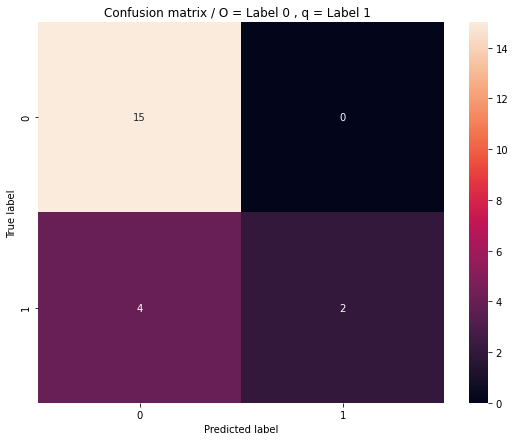

In [11]:
#Confusion matrix for testing

plt.figure(figsize=[20, 7])
plt.subplot(1,2,1)
title = 'Confusion matrix / O = Label 0 , q = Label 1  '
sns.heatmap(confusion_matrix(y_oq_test, predictions_test), annot=True, fmt='')
plt.title(title)
plt.xlabel('Predicted label');
plt.ylabel('True label');


print('\n So here letter o is classified an o 15 times and 0 times letter q which is very good ')
print('\n and letter q is classified o 4 times and 2 times letter q which it got confused with 2 cases with is quite bad compared to o ')

## Recall , precision , accuracy
----------------------------------

#### Machine learning model accuracy is the measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input, or training data. The better a model can generalize to ‘unseen’ data, the better predictions and insights it can produce
Accuracy is the number or correct predictions divided over the total number of predictions

 
#### Precision: is the ratio of true positives to the total of the true positives and false positives. Precision looks to see how much junk positives got thrown in the mix. If there are no bad positives (those FPs), then the model had 100% precision. The more FPs that get into the mix, the uglier that precision is going to look.The recall rate is penalized whenever a false negative is predicted. Because the penalties in precision and recall are opposites, so too are the equations themselves. Precision and recall are the yin and yang of assessing the confusion matrix.
Precision = TP/(TP + FP)

 
#### Recall goes another route. Instead of looking at the number of false positives the model predicted, recall looks at the number of false negatives that were thrown into the prediction mix.
Recall = TP/(TP + FN)

In [12]:
equation_test_oq = confusion_matrix(y_oq_test, predictions_test)

recall_test_oq = np.diag(equation_test_oq) / np.sum(equation_test_oq, axis = 1)
recall_test_oq[np.isnan(recall_test_oq)] = 0

precision_test_oq = np.diag(equation_test_oq) / np.sum(equation_test_oq, axis = 0)
precision_test_oq[np.isnan(precision_test_oq)] = 0

accur_test_oq= sum(np.diag(equation_test_oq))/len(x_oq_test)

recall_testoq= sum(recall_test_oq)/2
precision_testoq= sum(precision_test_oq)/2


print('Here the recall is excellenet as there is no FNs for class O  :  ',recall_test_oq[0])
print('Here the recall is very bad as there  are a lot of  FNs for class q:  ',recall_test_oq[1])
print('Here the precision is quite bad as there are quite many FPs for class o : ' , precision_test_oq[0])
print('Here the precision is excellenet as there is no FPs for class q : ', precision_test_oq[1])



print('\n')

print('oq recall for testing data:',recall_testoq*100)
print('It means that there are a lot of FNs when the model predicted which is bad')
print('\n')

print('oq precision for testing data:',precision_testoq*100)
print('It means that means there are a lot of FPs when the model predicted which is bad')
print('\n')

print('oq accuracy for testing data:',accur_test_oq*100)
print('It means that there many of TPs and TNs but not that enough which is bad ')


Here the recall is excellenet as there is no FNs for class O  :   1.0
Here the recall is very bad as there  are a lot of  FNs for class q:   0.3333333333333333
Here the precision is quite bad as there are quite many FPs for class o :  0.7894736842105263
Here the precision is excellenet as there is no FPs for class q :  1.0


oq recall for testing data: 66.66666666666666
It means that there are a lot of FNs when the model predicted which is bad


oq precision for testing data: 89.47368421052632
It means that means there are a lot of FPs when the model predicted which is bad


oq accuracy for testing data: 80.95238095238095
It means that there many of TPs and TNs but not that enough which is bad 


### printing roc curve and accuracy (testing)

An ROC curve  is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate - False Positive Rate

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes


 here the auc = 59% which tells the model is bad at distinguishing between the positive and negative classes  


C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


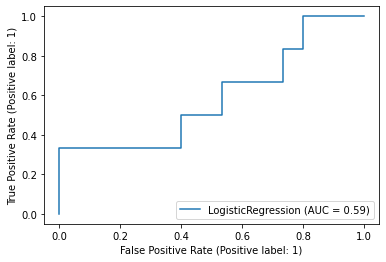

In [13]:
disp=plot_roc_curve(logisticRegr,x_oq_test,y_oq_test)

print('\n here the auc = 59% which tells the model is bad at distinguishing between the positive and negative classes  ')

In [14]:
#Printing accuracy

print('accuracy for testing data which is quite bad :',accuracy_score(y_oq_test, predictions_test)*100)

accuracy for testing data which is quite bad : 80.95238095238095


# Confusion matrix for training 


 here letter o is classified an o 118 times and 0 times letter q which is good 

 and letter q is classified o 2 times ,and 41 times letter q which is quite good compared to the testing case 


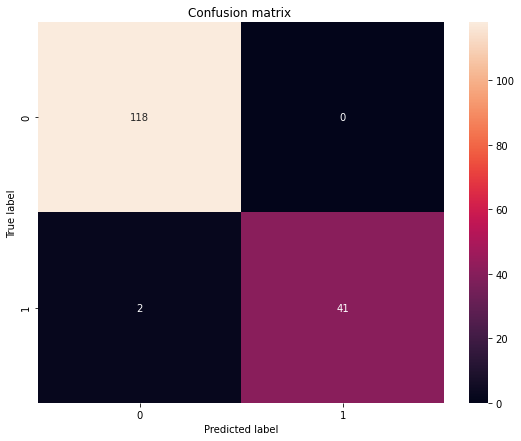

In [15]:
#Confusion matrix for training

plt.figure(figsize=[20, 7])
plt.subplot(1,2,1)
title = 'Confusion matrix '
sns.heatmap(confusion_matrix(y_oq_train, predictions_train), annot=True, fmt='')
plt.title(title)
plt.xlabel('Predicted label');
plt.ylabel('True label');

print('\n here letter o is classified an o 118 times and 0 times letter q which is good ')
print('\n and letter q is classified o 2 times ,and 41 times letter q which is quite good compared to the testing case ')

## Recall , precision , accuracy 

In [16]:
equation_train_oq = confusion_matrix(y_oq_train, predictions_train)

recall_train_oq = np.diag(equation_train_oq) / np.sum(equation_train_oq, axis = 1)
precision_train_oq = np.diag(equation_train_oq) / np.sum(equation_train_oq, axis = 0)
accur_train_oq= sum(np.diag(equation_train_oq))/len(x_oq_train)

recall_trainoq= sum(recall_train_oq)/2
precision_trainoq= sum(precision_train_oq)/2


print('Here the recall is excellenet as there is no FNs for class O  :  ',recall_train_oq[0])
print('Here the recall is quite good as there  are few FNs for class q:  ',recall_train_oq[1])
print('Here the precision is good as there are quite few FPs for class o : ' , precision_train_oq[0])
print('Here the precision is excellenet as there is no FPs for class q : ', precision_train_oq[1])
print('\n')


print('o,q recall for training data:',recall_trainoq*100)
print('It means that there are few FNs when the model predicted which good')
print('\n')

print('o,q precision for training data:',precision_trainoq*100)
print('It means that means there are very few FPs when the model predicted which is very good ')
print('\n')

print('o,q accuracy for training data:',accur_train_oq*100)
print('It means that there a lot of TP and TN which is very good but not excellent ')

print('----------------------------------------------')


Here the recall is excellenet as there is no FNs for class O  :   1.0
Here the recall is quite good as there  are few FNs for class q:   0.9534883720930233
Here the precision is good as there are quite few FPs for class o :  0.9833333333333333
Here the precision is excellenet as there is no FPs for class q :  1.0


o,q recall for training data: 97.67441860465115
It means that there are few FNs when the model predicted which good


o,q precision for training data: 99.16666666666667
It means that means there are very few FPs when the model predicted which is very good 


o,q accuracy for training data: 98.75776397515527
It means that there a lot of TP and TN which is very good but not excellent 
----------------------------------------------


### printing roc curve and accuracy (training)


 here the auc = 100% which the model excellent at distinguishing between the positive and negative classes 


C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


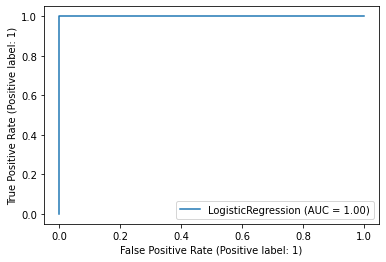

In [17]:

#Roc curve

disp=plot_roc_curve(logisticRegr,x_oq_train,y_oq_train)

print('\n here the auc = 100% which the model excellent at distinguishing between the positive and negative classes ')

In [18]:
#Printing accuracy

print('accuracy for training data which is good :',accuracy_score(y_oq_train, predictions_train)*100)

accuracy for training data which is good : 98.75776397515527


# Case G and 8 :

In [19]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_G8_train, y_G8_train)


predictions_test_g8 = logisticRegr.predict(x_G8_test)
predictions_train_g8 = logisticRegr.predict(x_G8_train)

C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion matrix for testing G,8


 here letter G is classified an G 14 times and 1 times digit 8 which is quite good 

 and digit 8 is classified G 3 times and 0 times digit 8 which it got confused and this is very bad  


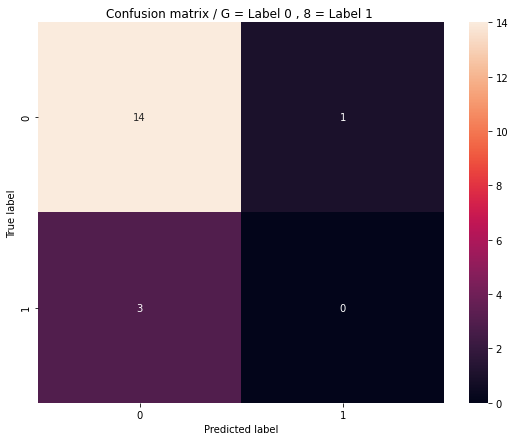

In [20]:
#Confusion matrix for testing

plt.figure(figsize=[20, 7])
plt.subplot(1,2,1)
title = 'Confusion matrix / G = Label 0 , 8 = Label 1 '
sns.heatmap(confusion_matrix(y_G8_test, predictions_test_g8), annot=True, fmt='')
plt.title(title)
plt.xlabel('Predicted label');
plt.ylabel('True label');
#G = Label 0 , 8 = Label 1
print('\n here letter G is classified an G 14 times and 1 times digit 8 which is quite good ')
print('\n and digit 8 is classified G 3 times and 0 times digit 8 which it got confused and this is very bad  ')

## Recall , precision , accuracy 

In [21]:
equation_test_G8 = confusion_matrix(y_G8_test, predictions_test_g8)

recall_test_G8 = np.diag(equation_test_G8) / np.sum(equation_test_G8, axis = 1)
recall_test_G8[np.isnan(recall_test_G8)] = 0

precision_test_G8 = np.diag(equation_test_G8) / np.sum(equation_test_G8, axis = 0)
precision_test_G8[np.isnan(precision_test_G8)] = 0

accur_test_G8= sum(np.diag(equation_test_G8))/len(x_G8_test)

recall_testG8= sum(recall_test_G8)/2
precision_testG8= sum(precision_test_G8)/2


print('Here the recall is quite good as there are quite many FNs for class O  :  ',recall_test_G8[0])
print('Here the recall is the worst case not very bad only as there are full ofFNs for class q:  ',recall_test_G8[1])
print('Here the precision is quite bad as there are many FPs for class o : ' , precision_test_G8[0])
print('Here the precision is the worst as there are full of FPs for class q : ', precision_test_G8[1])

print('\n')



print('G,8 recall for testing data:',recall_testG8*100)
print('It means that there are a lot of FNs when the model predicted which is very bad')
print('\n')

print('G,8 precision for testing data:',precision_testG8*100)
print('It means that means there are a lot of FPs when the model predicted which is very bad')
print('\n')

print('G,8 accuracy for testing data:',accur_test_G8*100)
print('It means that there few of TPs and TNs  which is bad ')



Here the recall is quite good as there are quite many FNs for class O  :   0.9333333333333333
Here the recall is the worst case not very bad only as there are full ofFNs for class q:   0.0
Here the precision is quite bad as there are many FPs for class o :  0.8235294117647058
Here the precision is the worst as there are full of FPs for class q :  0.0


G,8 recall for testing data: 46.666666666666664
It means that there are a lot of FNs when the model predicted which is very bad


G,8 precision for testing data: 41.17647058823529
It means that means there are a lot of FPs when the model predicted which is very bad


G,8 accuracy for testing data: 77.77777777777779
It means that there few of TPs and TNs  which is bad 


### printing roc curve and accuracy (testing)


 here the auc = 33% which the model is very bad at distinguishing between the positive and negative classes  


C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


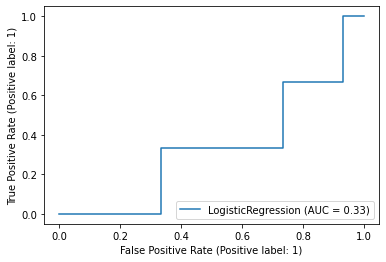

In [22]:

plot_roc_curve(logisticRegr, x_G8_test, y_G8_test)

print('\n here the auc = 33% which the model is very bad at distinguishing between the positive and negative classes  ')

In [23]:

#Printing accuracy
print('accuracy for testing data which is bad :  ',accuracy_score(y_G8_test, predictions_test_g8)*100)

accuracy for testing data which is bad :   77.77777777777779


## Confusion matrix for training G,8


 here letter G is classified G 114 times and 0 times digit 8 which is very good 

 and digit 8 is classified G 4 times and 22 times digit 8 which it got confused and this is quite bad  


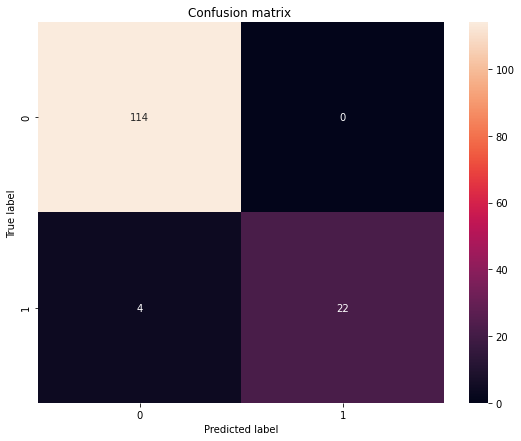

In [24]:
#Confusion matrix for testing

plt.figure(figsize=[20, 7])
plt.subplot(1,2,1)
title = 'Confusion matrix '
sns.heatmap(confusion_matrix(y_G8_train, predictions_train_g8), annot=True, fmt='')
plt.title(title)
plt.xlabel('Predicted label');
plt.ylabel('True label');

print('\n here letter G is classified G 114 times and 0 times digit 8 which is very good ')
print('\n and digit 8 is classified G 4 times and 22 times digit 8 which it got confused and this is quite bad  ')


## Recall , precision , accuracy 

In [25]:
equation_train_G8 = confusion_matrix(y_G8_train, predictions_train_g8)

recall_train_G8 = np.diag(equation_train_G8) / np.sum(equation_train_G8, axis = 1)
precision_train_G8 = np.diag(equation_train_G8) / np.sum(equation_train_G8, axis = 0)
accur_train_G8= sum(np.diag(equation_train_G8))/len(x_G8_train)

recall_trainG8= sum(recall_train_G8)/2
precision_trainG8= sum(precision_train_G8)/2


print('Here the recall is excellenet as there is no FNs for class O  :  ',recall_train_G8[0])
print('Here the recall is bad as there are many FNs for class q:  ',recall_train_G8[1])
print('Here the precision is good as there are quite few FPs for class o : ' , precision_train_G8[0])
print('Here the precision is excellenet as there is no FPs for class q : ', precision_train_G8[1])
print('\n')


print('G,8 recall for training data:',recall_trainG8*100)
print('It means that there are few FNs when the model predicted which quite good')
print('\n')

print('G,8 precision for training data:',precision_trainG8*100)
print('It means that means there are very few FPs when the model predicted which is very good ')
print('\n')

print(' G,8 accuracy for training data:',accur_train_G8*100)
print('It means that there a lot of TP and TN which is very good but not excellent ')

print('----------------------------------------------')


Here the recall is excellenet as there is no FNs for class O  :   1.0
Here the recall is bad as there are many FNs for class q:   0.8461538461538461
Here the precision is good as there are quite few FPs for class o :  0.9661016949152542
Here the precision is excellenet as there is no FPs for class q :  1.0


G,8 recall for training data: 92.3076923076923
It means that there are few FNs when the model predicted which quite good


G,8 precision for training data: 98.30508474576271
It means that means there are very few FPs when the model predicted which is very good 


 G,8 accuracy for training data: 97.14285714285714
It means that there a lot of TP and TN which is very good but not excellent 
----------------------------------------------


### printing roc curve and accuracy (training)


 here the auc = 100% which the model excellent at distinguishing between the positive and negative classes  


C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


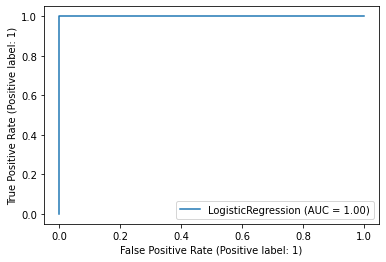

In [26]:

#Roc curve

plot_roc_curve(logisticRegr, x_G8_train, y_G8_train)

print('\n here the auc = 100% which the model excellent at distinguishing between the positive and negative classes  ')

In [27]:

#Printing accuracy

print('accuracy for training data which is very good :  ',accuracy_score(y_G8_train, predictions_train_g8)*100)

accuracy for training data which is very good :   97.14285714285714


# -------------------------------------------------------------------------------------------------------------

# Multiclass Classifier Case

Label 0 = 8 , 1 = G , 2 = o , 3 = q

In [28]:
#Preparing label for multiclass

ymul = []
for f in listOfFiles:
    if 'Sample009' in f:
        ymul.append('8')
    if 'Sample017' in f:
        ymul.append('G')
    if 'Sample051' in f:
        ymul.append('o')
    if 'Sample053' in f:
        ymul.append('q')

## Splitting data for multiclass

In [29]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem_mul, y_train, y_rem_mul = train_test_split(processed_imgs,ymul, train_size=0.8, random_state=42, stratify=ymul)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem_mul,y_rem_mul, test_size=0.5, stratify=y_rem_mul,random_state=42)

In [30]:
#for Multiclass

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)


y_multiclass_train = logisticRegr.predict(X_train)
y_multiclass_test = logisticRegr.predict(X_test)


C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Printing the length

In [31]:
print('Length of data :',len(processed_imgs))
print('------------------------------')

print('Length of X_train :',len(X_train))
print('------------------------------')

print('Length of X_test :',len(X_test))
print('------------------------------')

print('Length of X_valid :',len(X_valid))

Length of data : 377
------------------------------
Length of X_train : 301
------------------------------
Length of X_test : 38
------------------------------
Length of X_valid : 38


## Testing's confusion matrix


 here digit 8 is classified 8 0 times , 0 times G , 3 times o and 0 times q which is very bad

 here G is classified 8 2 times , 5 times G , 8 times o and 0 times q which is bad

 here O is classified 8 1 times , 5 times G , 9 times o and 0 times q which is quite bad but better than others

 here q is classified 8 3 times , 0 times G , 2 times o and 0 times q which is very bad


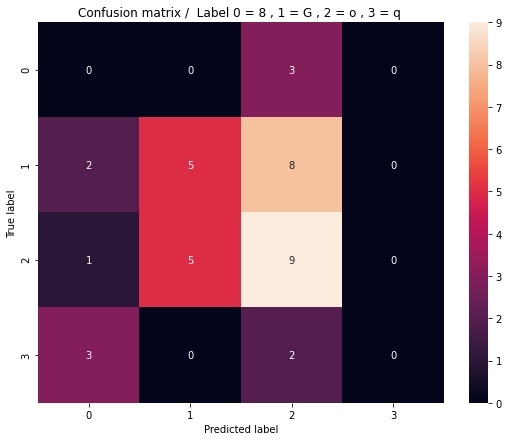

In [32]:
#Confusion matrix 

plt.figure(figsize=[20, 7])
plt.subplot(1,2,1)
title = 'Confusion matrix /  Label 0 = 8 , 1 = G , 2 = o , 3 = q '
sns.heatmap(confusion_matrix(y_test, y_multiclass_test), annot=True, fmt='')
plt.title(title)
plt.xlabel('Predicted label');
plt.ylabel('True label');

#Label 0 = 8 , 1 = G , 2 = o , 3 = q

print('\n here digit 8 is classified 8 0 times , 0 times G , 3 times o and 0 times q which is very bad' )
print('\n here G is classified 8 2 times , 5 times G , 8 times o and 0 times q which is bad')
print('\n here O is classified 8 1 times , 5 times G , 9 times o and 0 times q which is quite bad but better than others')
print('\n here q is classified 8 3 times , 0 times G , 2 times o and 0 times q which is very bad')


## Recall , precision , accuracy and F1-score


#### F1-score : is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’. But Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.

F1-score (2 x precision x recall) / (precision+recall)

In [33]:
equation_test = confusion_matrix(y_test, y_multiclass_test)

recall_test = np.diag(equation_test) / np.sum(equation_test, axis = 1)
recall_test[np.isnan(recall_test)] = 0

precision_test = np.diag(equation_test) / np.sum(equation_test, axis = 0)
precision_test[np.isnan(precision_test)] = 0

f1_Score_test=(2 * precision_test * recall_test) / (precision_test + recall_test)
f1_Score_test[np.isnan(f1_Score_test)] = 0

accur_test= sum(np.diag(equation_test))/len(X_test)

recall_avg_test= sum(recall_test)/4
precision_avg_test= sum(precision_test)/4
f1_avg_test= sum(f1_Score_test)/4

print('Average recall for testing data:',recall_avg_test*100)
print('It means that there are a lot of FNs when the model predicted which is very bad')
print('\n')

print('Average precision for testing data:',precision_avg_test*100)
print('It means that means there are a lot of FPs when the model predicted which is very bad but FNs is more worse')
print('\n')


print('f1_Score for testing data:',f1_avg_test*100)
print('It means that it is very bad as it is harmonic mean between precision and recall' )
print('\n')


print('accuracy for testing data:',accur_test*100)
print('It means that there few of TP and TN which is very bad ')



Average recall for testing data: 23.333333333333332
It means that there are a lot of FNs when the model predicted which is very bad


Average precision for testing data: 22.72727272727273
It means that means there are a lot of FPs when the model predicted which is very bad but FNs is more worse


f1_Score for testing data: 22.162162162162165
It means that it is very bad as it is harmonic mean between precision and recall


accuracy for testing data: 36.84210526315789
It means that there few of TP and TN which is very bad 


<ipython-input-33-37cc3b048d59>:6: RuntimeWarning: invalid value encountered in true_divide
  precision_test = np.diag(equation_test) / np.sum(equation_test, axis = 0)
<ipython-input-33-37cc3b048d59>:9: RuntimeWarning: invalid value encountered in true_divide
  f1_Score_test=(2 * precision_test * recall_test) / (precision_test + recall_test)


## Defining function for plotting roc curve for multiclass

In [34]:
def plot_roc(clf, x, y, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(x)

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()


    y__dummies = pd.get_dummies(y, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y__dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic ')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Printing accuracy and ROC for testing

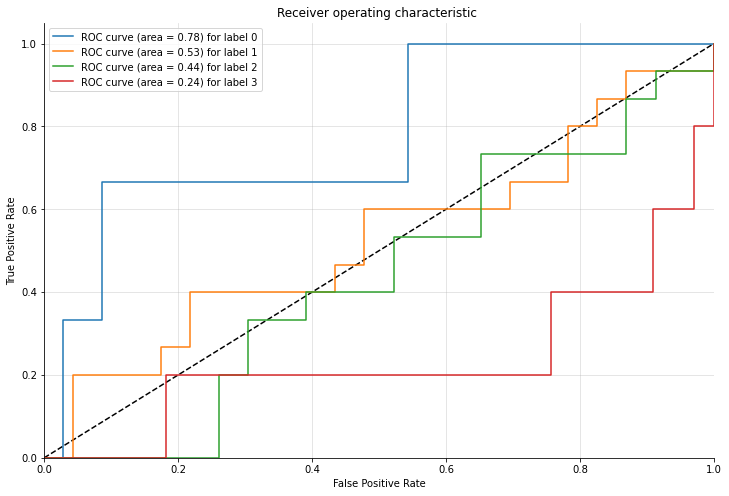


 as shown the auc tells the model is quite bad at distinguishing between the positive and negative classes for label 8  

 as shown the auc tells the model is bad at distinguishing between the positive and negative classes for label G  

 as shown the auc tells the model is very bad at distinguishing between the positive and negative classes for label o  

 as shown the auc tells the model is so bad at distinguishing between the positive and negative classes for label q  


In [35]:
#Roc curve
plot_roc(logisticRegr, X_test, y_test, n_classes=4, figsize=(12, 8))

#Label 0 = 8 , 1 = G , 2 = o , 3 = q

print('\n as shown the auc tells the model is quite bad at distinguishing between the positive and negative classes for label 8  ')
print('\n as shown the auc tells the model is bad at distinguishing between the positive and negative classes for label G  ')
print('\n as shown the auc tells the model is very bad at distinguishing between the positive and negative classes for label o  ')
print('\n as shown the auc tells the model is so bad at distinguishing between the positive and negative classes for label q  ')


In [36]:
#Printing accuracy

print('accuracy for testing data which is very bad :  ',accuracy_score(y_test, y_multiclass_test)*100)

accuracy for testing data which is very bad :   36.84210526315789


## Training Confusion matrix


 here digit 8 is classified 8 22 times , 1 times G , 3 times o and 0 times q which is quite good

 here G is classified 8 0 times , 109 times G , 5 times o and 0 times q which is good

 here O is classified 8 0 times , 4 times G , 114 times o and 0 times q which is good and better than others

 here q is classified 8 0 times , 1 times G , 1 times o and 41 times q which is quite good


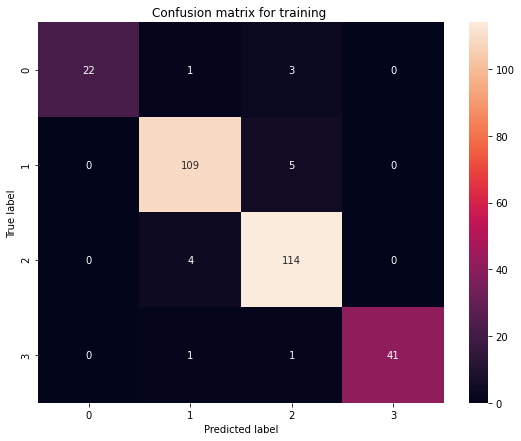

In [37]:
#Confusion matrix 

plt.figure(figsize=[20, 7])
plt.subplot(1,2,1)
title = 'Confusion matrix for training '
sns.heatmap(confusion_matrix(y_train, y_multiclass_train), annot=True, fmt='')
plt.title(title)
plt.xlabel('Predicted label');
plt.ylabel('True label');

print('\n here digit 8 is classified 8 22 times , 1 times G , 3 times o and 0 times q which is quite good' )
print('\n here G is classified 8 0 times , 109 times G , 5 times o and 0 times q which is good')
print('\n here O is classified 8 0 times , 4 times G , 114 times o and 0 times q which is good and better than others')
print('\n here q is classified 8 0 times , 1 times G , 1 times o and 41 times q which is quite good')

## Recall , precision , accuracy and F1-score

In [38]:
equation_train = confusion_matrix(y_train, y_multiclass_train)

recall_train = np.diag(equation_train) / np.sum(equation_train, axis = 1)
recall_train[np.isnan(recall_train)] = 0

precision_train = np.diag(equation_train) / np.sum(equation_train, axis = 0)
precision_train[np.isnan(precision_train)] = 0

f1_Score_train=(2 * precision_train * recall_train) / (precision_train + recall_train)
f1_Score_train[np.isnan(f1_Score_train)] = 0

accur_train= sum(np.diag(equation_train))/len(X_train)



recall_avg_tra= sum(recall_train)/4
precision_avg_tra= sum(precision_train)/4
f1_avg_tra= sum(f1_Score_train)/4

print('Average recall for training data :',recall_avg_tra*100)
print('It means that there are few FNs when the model predicted which quite good')
print('\n')

print('Average precision for training data :',precision_avg_tra*100)
print('It means that means there are few FPs when the model predicted which is good ')
print('\n')

print('f1_Score for training data :',f1_avg_tra*100)
print('It means that it is good as it is harmonic mean between precision and recall' )
print('\n')

print('accuracy for training data :',accur_train*100)
print('It means that there a lot of TP and TN which is good ')



Average recall for training data : 93.04710660098291
It means that there are few FNs when the model predicted which quite good


Average precision for training data : 96.8663838812301
It means that means there are few FPs when the model predicted which is good 


f1_Score for training data : 94.77200749114083
It means that it is good as it is harmonic mean between precision and recall


accuracy for training data : 95.01661129568106
It means that there a lot of TP and TN which is good 


### Printing accuracy and ROC for training

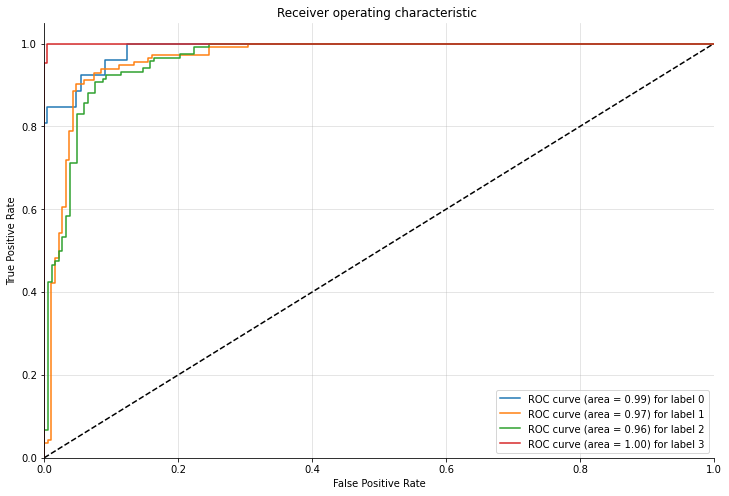


 as shown the auc tells the model is good at distinguishing between the positive and negative classes for label 8  

 as shown the auc tells the model is good at distinguishing between the positive and negative classes for label G  

 as shown the auc tells the model is good bad at distinguishing between the positive and negative classes for label o  

 as shown the auc tells the model is very good at distinguishing between the positive and negative classes for label q  


In [39]:
#roc curve 
plot_roc(logisticRegr, X_train, y_train, n_classes=4, figsize=(12, 8))

print('\n as shown the auc tells the model is good at distinguishing between the positive and negative classes for label 8  ')
print('\n as shown the auc tells the model is good at distinguishing between the positive and negative classes for label G  ')
print('\n as shown the auc tells the model is good bad at distinguishing between the positive and negative classes for label o  ')
print('\n as shown the auc tells the model is very good at distinguishing between the positive and negative classes for label q  ')

In [40]:
#Printing accuracy

print('accuracy for training data which is good :  ', accuracy_score(y_train, y_multiclass_train)*100)

accuracy for training data which is good :   95.01661129568106


## In the task the classifer did bad in the multiclass testing case ( acc = 36.84%) as there were 4 letters and maybe couldn't distinguish between G and 8 as they may look alike and also there is letter q will confuse it and between the G and O , q and 8 , also the quality will be a factor as after resizing it ,some images will lose quality. Furthermore, there are some photos in folders of the letters that are bad like letter o folder and also the folder of letter q has images look like digit 8 ( recall is 23.33 which means a lot of FNs which is very bad , Precision = 22.73 which mean a lot of FPs which is very bad and F1-score is 22.16 which is harmonic mean between precision and recall )